# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtain Data

Read recommender system data from csv file into df

In [2]:
df = pd.read_csv('Data/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


# Scrub Data

Perform df.info to check df column datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


Check for missing values by calculating df entries by column

In [4]:
for col in df.columns:
    print(f'{col} Datapoints:', len(df[col].values))

userId Datapoints: 25000095
movieId Datapoints: 25000095
rating Datapoints: 25000095
timestamp Datapoints: 25000095


Check for abnormal values in dataset

In [5]:
print('userId Values:')
print(df.groupby('userId').first().index.sort_values())
print()
print('movieId Values:')
print(df.groupby('movieId').first().index.sort_values())
print()
print('rating Value Counts:')
print(df['rating'].value_counts())

userId Values:
Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            162532, 162533, 162534, 162535, 162536, 162537, 162538, 162539,
            162540, 162541],
           dtype='int64', name='userId', length=162541)

movieId Values:
Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            209145, 209147, 209151, 209153, 209155, 209157, 209159, 209163,
            209169, 209171],
           dtype='int64', name='movieId', length=59047)

rating Value Counts:
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64


# Explore Data

Calculate descriptive statistics for movie ratings

In [6]:
df[['rating']].describe().style.format("{:,.2f}")

,rating
count,"25,000,095.00"
mean,3.53
std,1.06
min,0.50
25%,3.00
50%,3.50
75%,4.00
max,5.00


Plot distribution of movie ratings

Text(0, 0.5, 'Count')

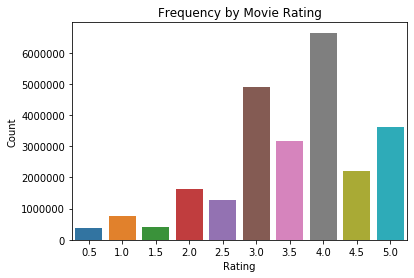

In [7]:
fig, ax = plt.subplots()
sns.countplot(x='rating', data=df, ax=ax)
ax.set_title('Frequency by Movie Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

Plot distribution of movie ratings with histogram

Text(0, 0.5, 'Relative Frequency')

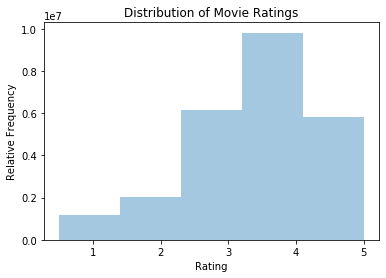

In [8]:
fig, ax = plt.subplots()
sns.distplot(df['rating'], bins=5, kde=False, ax=ax)
ax.set_title('Distribution of Movie Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Relative Frequency')

Calculate descriptive statistics for number of ratings by user

In [9]:
user_df = df.groupby('userId').count()
user_df[['rating']].describe()

,rating
count,162541.000000
mean,153.807932
std,268.047590
min,20.000000
25%,36.000000
50%,71.000000
75%,162.000000
max,32202.000000


Plot distribution for number of movie ratings by user

Text(0, 0.5, 'Count')

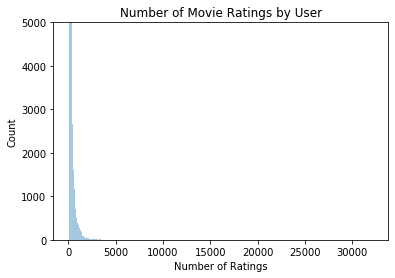

In [10]:
fig, ax = plt.subplots()
sns.distplot(user_df['rating'], bins=500, kde=False, ax=ax)
ax.set_title('Number of Movie Ratings by User')
ax.set_xlabel('Number of Ratings')
ax.set_ylim([0,5000])
ax.set_ylabel('Count')

Plot boxplot for number of movie ratings by user

Text(0, 0.5, 'Number of Movie Ratings')

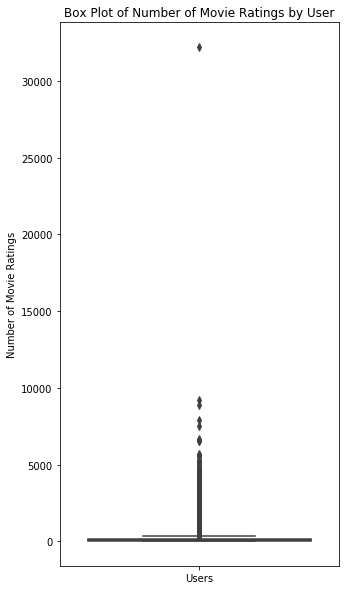

In [19]:
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(y='rating', data=user_df, ax=ax)
ax.set_title('Box Plot of Number of Movie Ratings by User')
ax.set_xticklabels(['Users'])
ax.set_ylabel('Number of Movie Ratings')

Calculate descriptive statistics for number of ratings by movie

In [12]:
movie_df = df.groupby('movieId').count()
movie_df['rating'].describe()

count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
Name: rating, dtype: float64

Plot distribution for number of ratings by movie

Text(0, 0.5, 'Count')

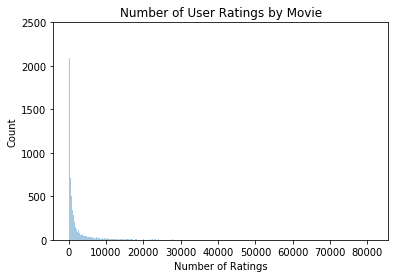

In [13]:
fig, ax = plt.subplots()
sns.distplot(movie_df['rating'], bins=500, kde=False, ax=ax)
ax.set_title('Number of User Ratings by Movie')
ax.set_xlabel('Number of Ratings')
ax.set_ylim([0,2500])
ax.set_ylabel('Count')

Plot boxplot for number of user ratings by movie

Text(0, 0.5, 'Number of User Ratings')

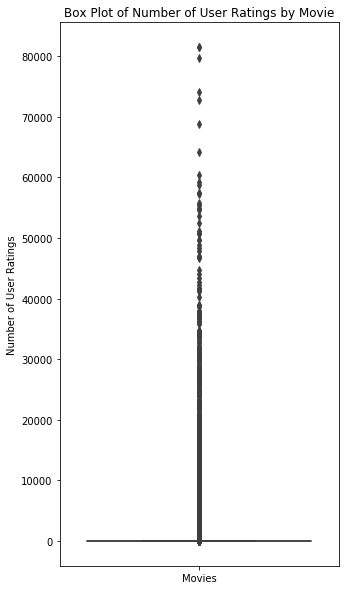

In [20]:
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(y='rating', data=movie_df, ax=ax)
ax.set_title('Box Plot of Number of User Ratings by Movie')
ax.set_xticklabels(['Movies'])
ax.set_ylabel('Number of User Ratings')

# Model Data

In [22]:
movie_df.shape

(59047, 3)

In [ ]:
df['movieId'].value_counts